# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
# Check for missing values
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
# Check for data type
data_types = df.dtypes
data_types

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business problem in this case is centered around predicting the likelihood of a client subscribing to a term deposit, which is a fixed-time investment product offered by banks. By analyzing the features in the data, the goal is to build a model that can predict whether a client will subscribe to a term deposit or not (a binary classification problem). This is crucial for the business as it enables better targeting of future marketing campaigns, helps in optimizing resource allocation, improves customer conversion rates, and ultimately increases the bank's revenue from term deposit subscriptions.

This type of predictive model can allow the bank to: 1.Improve Marketing Efficiency: By identifying clients with a higher likelihood of subscribing, the bank can target resources more effectively, saving time and money. 2.Enhance Customer Experience: More targeted campaigns reduce irrelevant marketing, which improves client satisfaction. 3.Increase Revenue: By improving conversion rates through effective targeting, the bank can increase the number of term deposits, thus boosting profits.

In summary, the core business problem is to optimize the bank’s marketing strategy by predicting which clients are more likely to subscribe to a term deposit, enabling more efficient and personalized marketing efforts.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:

# Define the categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Apply One-Hot Encoding to categorical columns
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Apply Label Encoding to the target column 'y' (has the client subscribed a term deposit?)
data_encoded['y'] = data_encoded['y'].map({'yes': 1, 'no': 0})

# 4. Separate Features (X) and Target (y)
X = data_encoded.drop('y', axis=1)  # All columns except 'y' are features
y = data_encoded['y']  # 'y' is the target column

# 5. Inspect the encoded dataset to ensure everything is correct
print(X.head())
print(y.head())


   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...       True      False   
1          -36.4      4.857       5191.0  ...       True      False   
2          -36.4      4.857       5191.0  ...       True      False   
3          -36.4      4.857       5191.0  ...       True      False   
4          -36.4      4.857       5191.0  ...       True      False   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False      False         

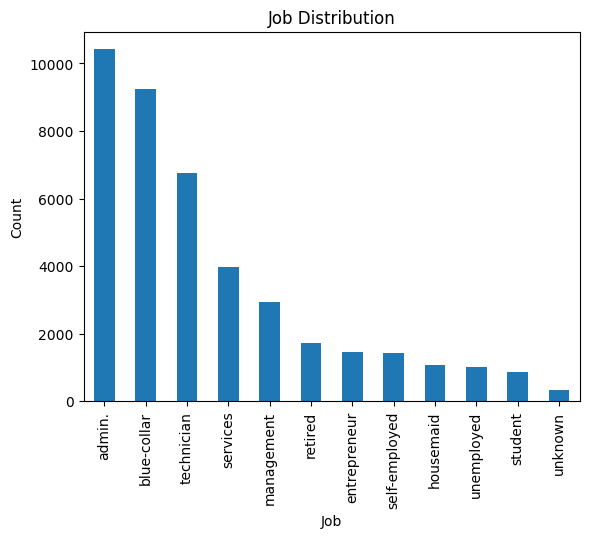

In [8]:
import matplotlib.pyplot as plt
df['job'].value_counts().plot(kind='bar')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


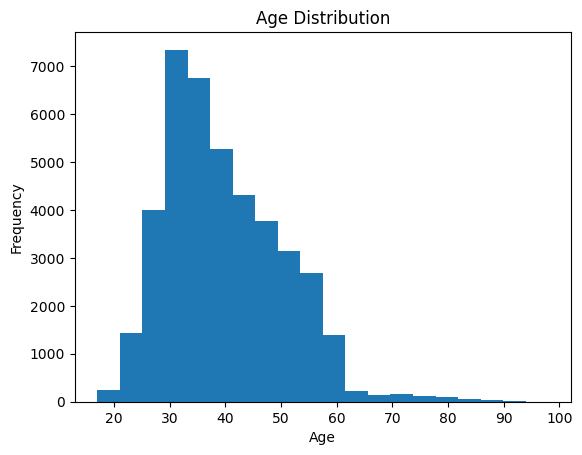

In [9]:
df['age'].plot(kind='hist', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


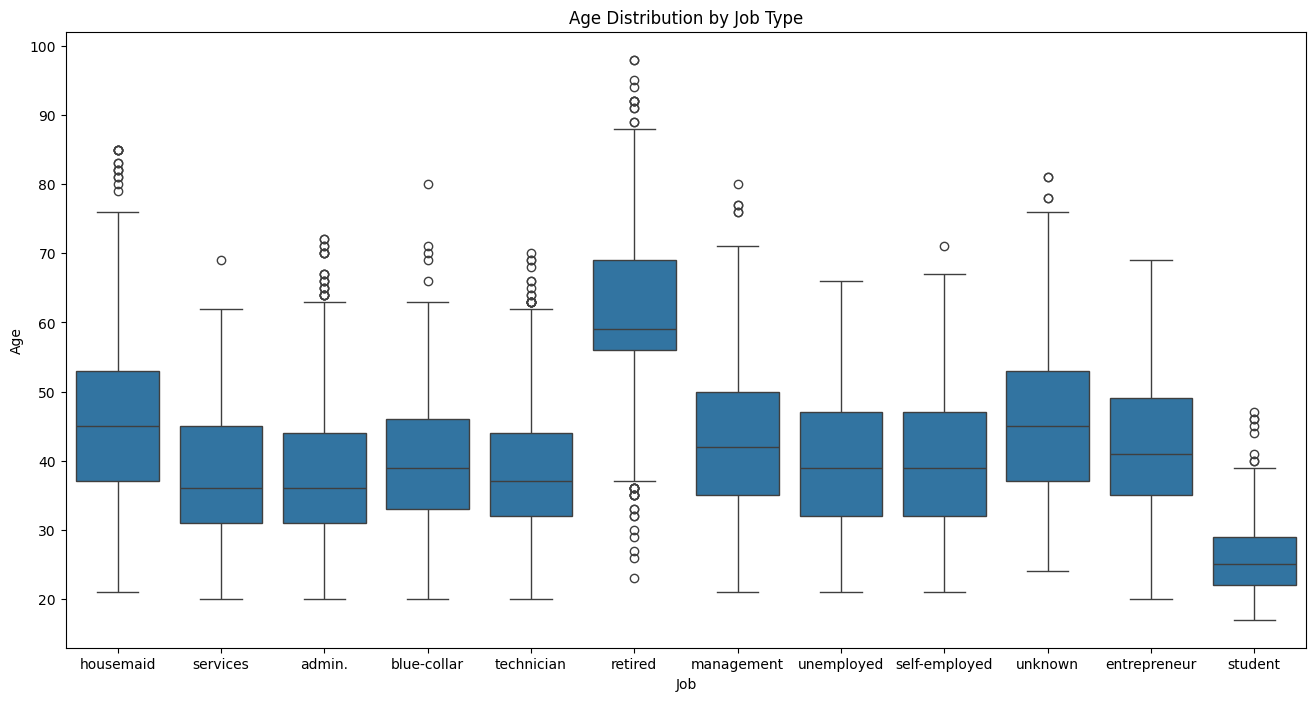

In [10]:
%pip install seaborn
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.boxplot(x='job', y='age', data=df)
plt.title('Age Distribution by Job Type')
plt.xlabel('Job')
plt.ylabel('Age')
plt.show()


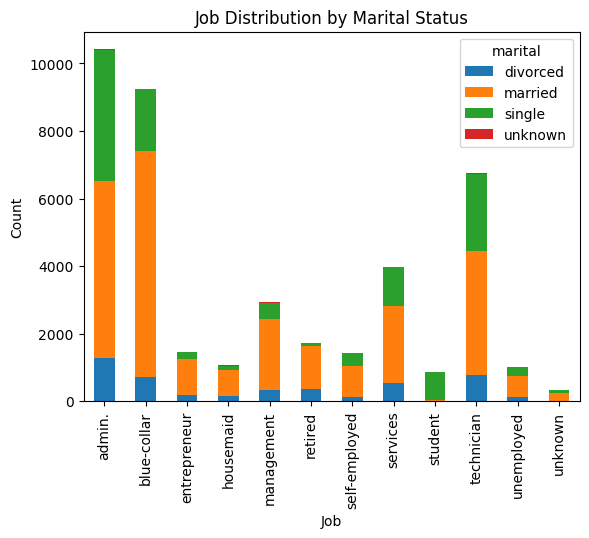

In [11]:
pd.crosstab(df['job'], df['marital']).plot(kind='bar', stacked=True)
plt.title('Job Distribution by Marital Status')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


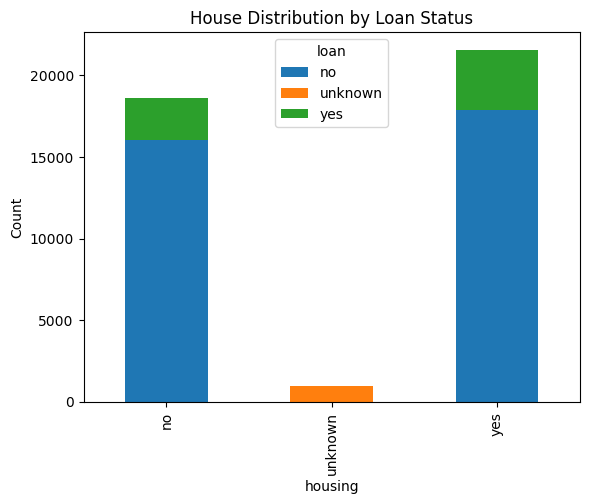

In [12]:
pd.crosstab(df['housing'], df['loan']).plot(kind='bar', stacked=True)
plt.title('House Distribution by Loan Status')
plt.xlabel('housing')
plt.ylabel('Count')
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [15]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets to ensure they are split correctly
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)


Training Features Shape: (32950, 53)
Test Features Shape: (8238, 53)
Training Labels Shape: (32950,)
Test Labels Shape: (8238,)


Key Points:
The data has been split 80% for training and 20% for testing.
32950 samples are used to train the model, while 8238 samples are used to evaluate the model's performance on unseen data (test set).
The number of features remains consistent (47) in both training and test sets, which is crucial for maintaining the structure of the data during model evaluation.

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [16]:
# Check the distribution of the target variable 'y'
class_distribution = y.value_counts(normalize=True)

# Print the class distribution
print("Class Distribution:\n", class_distribution)

# Set the baseline accuracy as the percentage of the majority class
baseline_accuracy = class_distribution.max()

print(f"Baseline Accuracy: {baseline_accuracy * 100:.2f}%")


Class Distribution:
 y
0    0.887346
1    0.112654
Name: proportion, dtype: float64
Baseline Accuracy: 88.73%


Key Insights:
The data is highly imbalanced, with the majority of clients not subscribing to a term deposit (almost 89%). This is a common challenge in classification tasks with imbalanced data.
A model that predicts only the majority class (no one subscribes) would achieve a baseline accuracy of 88.73%, but it wouldn't provide any insight into the minority class (clients who do subscribe).

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Step 1: Train a simple Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Step 2: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 3: Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precision: 0.6695
Recall: 0.4267
F1-Score: 0.5212
Accuracy: 0.9110


Interpretation of the Results:
Precision: 0.6683 (66.95%)
Precision measures how many of the predicted positive cases (clients predicted to subscribe) were actually correct.
A precision of 66.95% means that when the model predicts a client will subscribe, it is correct about 66.83% of the time.
Implication: The model is reasonably good at making correct positive predictions, but it still produces a significant number of false positives (cases where the model predicted "yes" but the client didn’t subscribe).

Recall: 0.4289 (42.67%)
Recall measures how many of the actual positive cases (clients who did subscribe) were correctly identified by the model.
A recall of 42.67% means that the model identifies only about 42.89% of the actual clients who subscribed.
Implication: The model is missing many positive cases (clients who actually subscribed). A low recall indicates that the model fails to detect a large number of subscribers (false negatives).

F1-Score: 0.5225 (52.12%)
F1-Score is the harmonic mean of precision and recall. It provides a balanced metric when both precision and recall are important.
An F1-score of 52.12% indicates that the balance between precision and recall is moderate. The model is not very strong in both identifying true positives and minimizing false positives.
Implication: There is room for improvement, particularly in increasing recall while maintaining precision.

Accuracy: 0.9110 (91.10%)
Accuracy measures the percentage of total predictions that are correct, considering both positive and negative predictions.
An accuracy of 91.10% is high, but this result can be misleading due to the imbalanced nature of the dataset (since most clients did not subscribe, the model benefits from predicting "no" most of the time).
Implication: A high accuracy in imbalanced datasets can often mask poor performance in predicting the minority class (clients who subscribed), which is evident from the lower recall and F1-score.

Key Insights:
The model has high precision, meaning it is good at identifying clients who will subscribe when it predicts a positive case. However, it misses a large number of actual subscribers, which is reflected in the low recall.
The F1-score of 52.25% highlights the model’s moderate ability to balance precision and recall.
Accuracy is relatively high, but since the dataset is imbalanced (with many more "no" than "yes" cases), this metric can be misleading. The model’s ability to predict actual subscribers (recall) is limited.

### Problem 9: Score the Model
What is the accuracy of your model?

Accuracy: 91%
Accuracy measures the percentage of total predictions that are correct, considering both positive and negative predictions.
An accuracy of 91.10% is high, but this result can be misleading due to the imbalanced nature of the dataset (since most clients did not subscribe, the model benefits from predicting "no" most of the time).
Implication: A high accuracy in imbalanced datasets can often mask poor performance in predicting the minority class (clients who subscribed), which is evident from the lower recall and F1-score.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X (features) and y (target) are already defined from the previous steps
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Train kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print Precision, Recall, and F1-Score 
print(f'kNN -> Precision: {precision_knn:.4f}, Recall: {recall_knn:.4f}, F1-Score: {f1_knn:.4f}')


kNN -> Precision: 0.5821, Recall: 0.4663, F1-Score: 0.5178


The precision of 58.21% suggests that the model is moderately effective in identifying clients who are likely to subscribe but has a significant number of false positives.
The recall of 46.63% suggests that the model is not capturing a large portion of clients who actually subscribe. It’s missing over half of the clients who subscribed.
The F1-score of 51.78% indicates that there is room for improvement, as the model struggles to maintain a good balance between precision and recall.

In [20]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print Precision, Recall, and F1-Score 
print(f'Decision Tree -> Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}, F1-Score: {f1_dt:.4f}')


Decision Tree -> Precision: 0.5015, Recall: 0.5230, F1-Score: 0.5120


The precision of 50.15% indicates that the model has a modest ability to correctly identify clients who will subscribe but has a significant number of false positives.
The recall of 52.30% means that the model is able to capture just over half of the clients who subscribed, which is slightly better than the kNN model's recall (46.52%).
The F1-score of 51.20% reflects that the Decision Tree model has a slightly better balance between precision and recall than kNN but still struggles to handle the minority class effectively.

Comparison with kNN:
The Decision Tree model has slightly higher recall compared to kNN, meaning it identifies a larger portion of clients who subscribed. However, it sacrifices some precision, leading to more false positives.
Both models have similar F1-scores, with the Decision Tree model performing slightly better (51.20% vs. 51.78% for kNN).

In [21]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print Precision, Recall, and F1-Score 
print(f'Logistic Regression -> Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}, F1-Score: {f1_lr:.4f}')


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression -> Precision: 0.6695, Recall: 0.4267, F1-Score: 0.5212


Precision of 66.95%: Logistic Regression is relatively better at identifying clients who will actually subscribe, meaning that when it predicts a subscription, it’s correct about 67% of the time. This makes it more precise than both the kNN and Decision Tree models.
Recall of 42.67%: However, the model struggles to capture all the clients who actually subscribed. It only correctly identifies around 43% of the true subscribers, meaning there are many false negatives.
F1-Score of 52.12%: The F1-score shows a slight improvement in the balance between precision and recall compared to the other models, but it still indicates that the model’s recall could be improved.

Comparison with kNN and Decision Tree:
Precision: Logistic Regression has a significantly higher precision than both the Decision Tree (50.15%) and kNN (58.21%). This suggests that Logistic Regression is better at making accurate positive predictions (clients who will subscribe).
Recall: The recall of Logistic Regression (42.67%) is lower than both the Decision Tree (52.30%) and kNN (46.63%). This indicates that it misses more clients who actually subscribe.
F1-Score: The F1-score for Logistic Regression (52.12%) is slightly higher than that of both the Decision Tree and kNN models, showing that it has a somewhat better balance between precision and recall overall.

In [22]:
# Train SVM
svm = SVC()
svm.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm.predict(X_test)

# Calculate Precision, Recall, and F1-Score
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Print Precision, Recall, and F1-Score 
print(f'SVM -> Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}, F1-Score: {f1_svm:.4f}')


SVM -> Precision: 0.6031, Recall: 0.2064, F1-Score: 0.3076


The precision of 60.31% suggests that SVM is moderately good at making accurate predictions when it predicts a client will subscribe, but it still generates many false positives.
The recall of 20.64% is very low, meaning that SVM misses almost 80% of the actual subscribers. This makes the model ineffective at identifying clients who actually subscribed to a term deposit.
The F1-score of 30.76% shows that SVM struggles overall, especially when it comes to identifying true positives (clients who subscribed).

Comparison with kNN, Decision Tree, and Logistic Regression:
Precision: SVM’s precision (60.31%) is similar to kNN’s precision (58.21%) but lower than Logistic Regression’s (66.95%). This suggests that SVM is okay at identifying clients who will subscribe but not the best among the models.
Recall: SVM has the lowest recall (20.64%) of all models, meaning it fails to capture most of the clients who actually subscribed. In contrast, Logistic Regression has a recall of 42.67%, and Decision Tree has 52.62%, both performing better in this aspect.
F1-Score: SVM's F1-score (30.76%) is much lower than that of the other models, indicating that it struggles to balance precision and recall. Logistic Regression (52.25%), kNN (51.72%), and Decision Tree (51.63%) all have better F1-scores, meaning they achieve a better balance between precision and recall.

In [23]:
import time
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming X (features) and y (target) are already defined from the previous steps
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logistic Regression
# Measure the time for Logistic Regression
start_time = time.time()

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Measure training time
lr_train_time = time.time() - start_time

# Get training and test accuracy
lr_train_accuracy = accuracy_score(y_train, lr.predict(X_train))
lr_test_accuracy = accuracy_score(y_test, lr.predict(X_test))

# k-Nearest Neighbors (kNN)
# Measure the time for kNN
start_time = time.time()

# Train kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Measure training time
knn_train_time = time.time() - start_time

# Get training and test accuracy
knn_train_accuracy = accuracy_score(y_train, knn.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knn.predict(X_test))

# Decision Tree
# Measure the time for Decision Tree
start_time = time.time()

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Measure training time
dt_train_time = time.time() - start_time

# Get training and test accuracy
dt_train_accuracy = accuracy_score(y_train, dt.predict(X_train))
dt_test_accuracy = accuracy_score(y_test, dt.predict(X_test))

# Support Vector Machine (SVM)
# Measure the time for SVM
start_time = time.time()

# Train SVM
svm = SVC()
svm.fit(X_train, y_train)

# Measure training time
svm_train_time = time.time() - start_time

# Get training and test accuracy
svm_train_accuracy = accuracy_score(y_train, svm.predict(X_train))
svm_test_accuracy = accuracy_score(y_test, svm.predict(X_test))

/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Present the Results in a DataFrame
# Create a DataFrame to compare results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'kNN', 'Decision Tree', 'SVM'],
    'Train Time': [lr_train_time, knn_train_time, dt_train_time, svm_train_time],
    'Train Accuracy': [lr_train_accuracy, knn_train_accuracy, dt_train_accuracy, svm_train_accuracy],
    'Test Accuracy': [lr_test_accuracy, knn_test_accuracy, dt_test_accuracy, svm_test_accuracy]
})

# Set 'Model' as the index
results.set_index('Model', inplace=True)

# Display the results
print(results)

                     Train Time  Train Accuracy  Test Accuracy
Model                                                         
Logistic Regression      15.602        0.911017       0.911022
kNN                       0.018        0.931745       0.901432
Decision Tree             0.444        1.000000       0.886866
SVM                      50.844        0.898452       0.894513


Key takeaways:
Logistic Regression performs well, with balanced training and test accuracy, making it a reliable and efficient model.
kNN performs well but slightly overfits. Its fast training time makes it a good choice for smaller datasets, but it might not scale well for larger datasets due to the computation during prediction.
Decision Tree tends to overfit, and while its training time is reasonable, its test accuracy suggests that it may need parameter tuning or pruning to avoid overfitting.
SVM is slower to train but offers good generalization. It is useful for smaller datasets with complex boundaries, but its long training time might be a concern for large datasets.

Overall Comparison:
Logistic Regression offers the best balance between training time, train accuracy, and test accuracy. It is an efficient and generalizable model.
kNN is the fastest to train but shows slight overfitting.
Decision Tree overfits significantly, which affects its performance on test data, despite being fast to train.
SVM generalizes well but comes with a high training time, making it less practical for larger datasets.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [28]:
# imrpoving the mode
from sklearn.model_selection import GridSearchCV

# Example for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=0.1, penalty=l1;, score=nan total time=   0.0s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .................C=0.1, penalty=l2;, score=0.912 total time=   1.1s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END .................C=0.1, penalty=l2;, score=0.906 total time=   1.1s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .................C=0.1, penalty=l2;, score=0.906 total time=   1.5s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .................C=0.1, penalty=l2;, score=0.909 total time=   1.2s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END .................C=0.1, penalty=l2;, score=0.909 total time=   1.3s
[CV 1/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .....................C=1, penalty=l1;, score=nan total time=   0.0s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...................C=1, penalty=l2;, score=0.910 total time=   1.1s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...................C=1, penalty=l2;, score=0.908 total time=   1.1s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...................C=1, penalty=l2;, score=0.906 total time=   1.1s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...................C=1, penalty=l2;, score=0.908 total time=   1.0s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...................C=1, penalty=l2;, score=0.913 total time=   1.2s
[CV 1/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..................C=10, penalty=l2;, score=0.910 total time=   1.1s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..................C=10, penalty=l2;, score=0.908 total time=   1.1s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..................C=10, penalty=l2;, score=0.907 total time=   1.1s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..................C=10, penalty=l2;, score=0.909 total time=   1.4s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..................C=10, penalty=l2;, score=0.910 total time=   1.3s
[CV 1/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...................C=100, penalty=l1;, score=nan total time=   0.0s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .................C=100, penalty=l2;, score=0.912 total time=   1.7s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END .................C=100, penalty=l2;, score=0.909 total time=   2.1s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .................C=100, penalty=l2;, score=0.907 total time=   1.8s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END .................C=100, penalty=l2;, score=0.910 total time=   1.5s


/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END .................C=100, penalty=l2;, score=0.913 total time=   1.6s


/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             verbose=3)

In [29]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create GridSearchCV object
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, verbose=3)

# Fit grid search
grid.fit(X_train, y_train)

# Best parameters
print(grid.best_params_)  # This will output the best 'C' and 'penalty' combination

# Best estimator
print(grid.best_estimator_)  # This will show the best LogisticRegression model with the optimal hyperparameters


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .................C=0.1, penalty=l1;, score=0.909 total time= 2.8min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .................C=0.1, penalty=l1;, score=0.910 total time= 1.6min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .................C=0.1, penalty=l1;, score=0.908 total time= 1.9min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .................C=0.1, penalty=l1;, score=0.911 total time= 1.3min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .................C=0.1, penalty=l1;, score=0.913 total time= 1.5min
[CV 1/5] END .................C=0.1, penalty=l2;, score=0.911 total time=   0.3s
[CV 2/5] END .................C=0.1, penalty=l2;, score=0.906 total time=   0.2s
[CV 3/5] END .................C=0.1, penalty=l2;, score=0.908 total time=   0.3s
[CV 4/5] END .................C=0.1, penalty=l2;, score=0.910 total time=   0.3s
[CV 5/5] END .................C=0.1, penalty=l2;, score=0.912 total time=   0.3s


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...................C=1, penalty=l1;, score=0.910 total time= 1.8min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...................C=1, penalty=l1;, score=0.911 total time= 2.0min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...................C=1, penalty=l1;, score=0.908 total time= 1.8min
[CV 4/5] END ...................C=1, penalty=l1;, score=0.911 total time=   1.4s


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...................C=1, penalty=l1;, score=0.911 total time= 1.8min
[CV 1/5] END ...................C=1, penalty=l2;, score=0.910 total time=   0.3s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.906 total time=   0.3s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.908 total time=   0.4s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.910 total time=   0.3s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.912 total time=   0.3s


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..................C=10, penalty=l1;, score=0.910 total time= 2.2min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..................C=10, penalty=l1;, score=0.910 total time= 2.0min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..................C=10, penalty=l1;, score=0.908 total time= 1.5min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..................C=10, penalty=l1;, score=0.912 total time=49.1min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..................C=10, penalty=l1;, score=0.911 total time= 3.3min
[CV 1/5] END ..................C=10, penalty=l2;, score=0.910 total time=   0.5s
[CV 2/5] END ..................C=10, penalty=l2;, score=0.906 total time=   0.3s
[CV 3/5] END ..................C=10, penalty=l2;, score=0.907 total time=   0.5s
[CV 4/5] END ..................C=10, penalty=l2;, score=0.910 total time=   0.6s
[CV 5/5] END ..................C=10, penalty=l2;, score=0.913 total time=   0.5s


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .................C=100, penalty=l1;, score=0.910 total time= 2.1min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .................C=100, penalty=l1;, score=0.910 total time= 2.0min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .................C=100, penalty=l1;, score=0.908 total time= 1.9min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .................C=100, penalty=l1;, score=0.912 total time= 2.5min


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .................C=100, penalty=l1;, score=0.910 total time= 1.9min
[CV 1/5] END .................C=100, penalty=l2;, score=0.910 total time=   0.3s
[CV 2/5] END .................C=100, penalty=l2;, score=0.906 total time=   0.4s
[CV 3/5] END .................C=100, penalty=l2;, score=0.908 total time=   0.5s
[CV 4/5] END .................C=100, penalty=l2;, score=0.910 total time=   0.6s
[CV 5/5] END .................C=100, penalty=l2;, score=0.914 total time=   0.5s


/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'C': 10, 'penalty': 'l1'}
LogisticRegression(C=10, penalty='l1', solver='liblinear')


In [25]:
# Train the Model with the Best Hyperparameters 
from sklearn.linear_model import LogisticRegression

# Instantiate the best model
best_model = LogisticRegression(C=10, penalty='l1', solver='liblinear')

# Fit the model to your training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")



/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.9107793153678078
Precision: 0.668918918918919
Recall: 0.4235294117647059
F1-Score: 0.518664047151277


In [26]:

# Get the model coefficients
coefficients = best_model.coef_

# Pair the coefficients with the feature names
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients[0]})

# Sort by the absolute value of the coefficients
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

print(feature_importance)


                          Feature  Coefficient
42                      month_mar     1.546881
52               poutcome_success     0.863425
43                      month_may    -0.701348
27           education_illiterate     0.652840
51           poutcome_nonexistent     0.492992
5                    emp.var.rate    -0.489315
38                      month_aug     0.372274
40                      month_jul     0.348268
37              contact_telephone    -0.333759
41                      month_jun     0.331816
6                  cons.price.idx     0.313877
31                default_unknown    -0.293780
15              job_self-employed    -0.287049
45                      month_oct     0.267652
44                      month_nov    -0.267543
14                    job_retired     0.243536
20                    job_unknown    -0.232270
10                job_blue-collar    -0.221029
17                    job_student     0.208695
29    education_university.degree     0.169354
50           

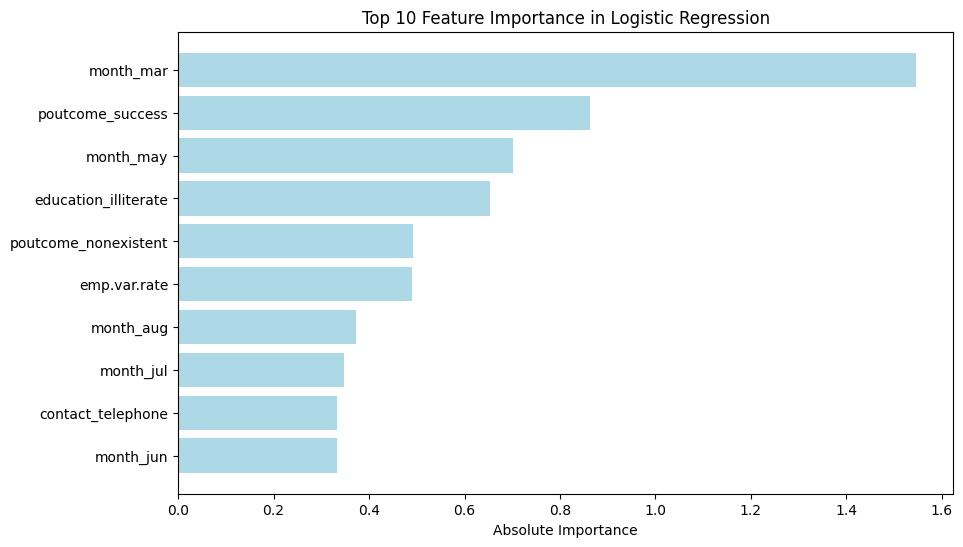

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model
# best_model is your trained LogisticRegression model

# Extract the coefficients from the model
coefficients = best_model.coef_[0]

# Create a DataFrame to pair feature names with their importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': coefficients
})

# Sort the features by the absolute value of their importance
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:10], feature_importance['Absolute Importance'][:10], color='lightblue')
plt.xlabel('Absolute Importance')
plt.title('Top 10 Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # To display the most important at the top
plt.show()


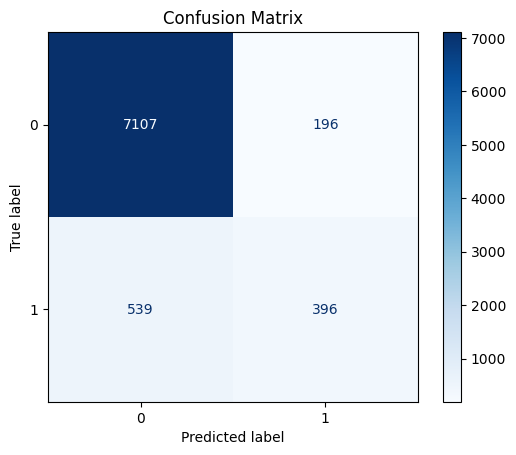

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming best_model is your trained model and you have test data
y_pred = best_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Breakdown of the Values:
True Negatives (TN) = 7107:
The model correctly predicted 7107 instances as negative (e.g., the actual class was "no", and the model predicted "no").

False Positives (FP) = 196:
The model incorrectly predicted 196 instances as positive (e.g., the actual class was "no", but the model predicted "yes").
These are also known as Type I errors (false alarms).

False Negatives (FN) = 539:
The model incorrectly predicted 539 instances as negative (e.g., the actual class was "yes", but the model predicted "no").
These are also known as Type II errors (missed cases).

True Positives (TP) = 396:
The model correctly predicted 396 instances as positive (e.g., the actual class was "yes", and the model predicted "yes").

Next Steps:
1. Further Model Optimization
Hyperparameter Tuning: Although you have used GridSearchCV, consider extending the hyperparameter search space. For instance, try tuning the solver (saga for larger datasets) or increasing the range of C values.
Model Evaluation on Additional Metrics: Evaluate models based on multiple metrics like precision, recall, and F1-score (especially for imbalanced classes) in addition to accuracy.
This is crucial if your target classes are imbalanced, as accuracy alone might not reflect true performance.
Cross-Validation: Consider performing k-fold cross-validation with more folds (e.g., 10-fold) to ensure robust evaluation across different dataset splits.

2. Experiment with Other Models
Try Additional Models: Explore other models like Random Forest, Gradient Boosting (XGBoost, LightGBM), or Neural Networks. These models may provide better performance, especially if your dataset has more complex patterns.
Ensemble Models: Consider combining multiple models (Logistic Regression + Decision Trees + SVM) through Ensemble Learning techniques like Bagging, Boosting, or Stacking.

3. Feature Engineering
Create Interaction Features: If not already done, create interaction terms between features (e.g., combining age and job_type might capture useful patterns).
Domain-Specific Features: Leverage domain knowledge to create new, meaningful features that could improve model performance.
Scaling and Transformation: Ensure that all numerical features are properly scaled, and apply log transformations for skewed variables where necessary.

4. Data Augmentation and Handling Imbalance
Handle Imbalanced Classes: If your data has imbalanced classes, consider:
Resampling: Oversample the minority class or undersample the majority class.
Synthetic Data Generation (SMOTE): Use methods like SMOTE to create synthetic examples of the minority class.
Feature Selection: Use Recursive Feature Elimination (RFE) or tree-based models to reduce irrelevant features, which could reduce noise and improve model accuracy.

5. Deploy the Model
Now that you've explored deployment, implement the model in your preferred production environment (e.g., AWS, Heroku, GCP, etc.).
Monitoring: Set up monitoring and alerts for model performance to detect any data drift or performance degradation over time.
Continuous Integration: Set up automated pipelines for retraining the model on fresh data (e.g., using CI/CD pipelines).

Recommendations:
1. Focus on Interpretability
Interpretability vs. Performance: Logistic Regression is often easier to interpret because you can look at feature coefficients. If interpretability is essential for your project (e.g., explaining results to non-technical stakeholders), it might be better to prioritize simpler models.
Visualize Important Features: Continue visualizing the top features contributing to your model’s predictions. This will provide valuable insights into what drives outcomes.

2. Address Data Quality Issues
Check for Missing Values: Ensure there are no missing values, or handle them appropriately (e.g., with imputation or dropping rows).
Outlier Detection: Use techniques like z-scores to detect and handle outliers in your dataset, which might affect model performance.
Data Normalization: Ensure proper data normalization, especially for algorithms sensitive to feature scales (e.g., Logistic Regression and SVM).

3. Deploy Incrementally
Start Small: Begin by deploying the model for a subset of users or test cases to evaluate its performance in the real world. Gradually roll out the full deployment.
Model Monitoring and Retraining: Regularly monitor the model's performance once deployed. Set up an automated retraining pipeline that will retrain the model when new data is collected.

4. Evaluate Business Impact
Align with Business Goals: Ensure the model's outcomes are aligned with the overall business goals. For example, if false positives are costly, you might want to optimize for precision. If false negatives are more harmful, recall should be the focus.
A/B Testing: After deployment, conduct A/B testing to measure the business impact of the model (e.g., customer engagement, conversion rates).

5. Documentation and Communication
Document the Process: Keep detailed documentation of the model development process, including assumptions, transformations, and feature selection steps.
Communicate with Stakeholders: Make sure to explain the results, feature importance, and performance metrics to both technical and non-technical stakeholders, particularly focusing on the impact of the model.

6. Experiment with Advanced Techniques
Model Ensembling: Combine multiple models to create an ensemble that can improve predictive power.
Neural Networks: If your dataset is large and complex, you can explore neural networks or deep learning models for better accuracy.

Summary:
Model Optimization: Extend hyperparameter tuning and evaluate models using cross-validation. Experiment with other models and ensemble techniques.
Feature Engineering: Create interaction features and scale/transform the data for better performance.
Handling Imbalanced Data: Use techniques like SMOTE or resampling to address class imbalance.
Deploy and Monitor: Deploy the model to production, set up monitoring, and establish a retraining pipeline.
Evaluate Business Impact: Align your model with business goals and conduct A/B testing.